### Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.
- Simple Linear Regression
Simple linear regression is an approach for predicting a response using a single feature.

#### WHY Linear Regression?
- To find the parameters so that the model **best fits** the data.
- Forecasting an effect
- Determing a Trend
#### How do we determine the best fit line? 
- The line for which the the error between the **predicted** values and the **observed** values is minimum is called the best fit line or the regression line. These errors are also called as **residuals**. 
- The residuals can be visualized by the vertical lines from the observed data value to the **regression line**.

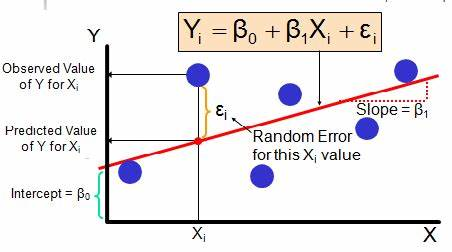

## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

- Linear regression calculates an equation that minimizes the distance between the fitted line and all of the data points

- Describe model(pandas and data frame conversion)
- Numpy mathemathical (ararys)
- Plots 
- Skilearn module to import regression alogirthm 

## Using Pandas and scikit-learn lib Predict scores of student on basis of study hours

In [1]:
## Importing required libariries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline 

**% Matplotlib : With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it**

In [4]:
d=pd.read_excel(r"C:\Users\suyashi144893\Documents\Python Analytics\Machine Learning\Machine Learning\Machine Learning Foundation\Exam_Score.xlsx")

In [5]:
d.head(2)

,Study hours,Scores
0,0.5,5
1,0.6,6


In [6]:
d.shape

(70, 2)

In [7]:
d.describe()
#d.shape
## Scores = m(s.h)+c 

,Study hours,Scores
count,70.000000,70.000000
mean,4.944286,57.357143
std,3.124176,29.689229
min,0.500000,5.000000
25%,2.325000,32.500000
50%,4.100000,60.000000
75%,7.550000,84.000000
max,11.000000,100.000000


In [8]:
d.isnull().sum()

Study hours    0
Scores         0
dtype: int64

## Visualizing  fields

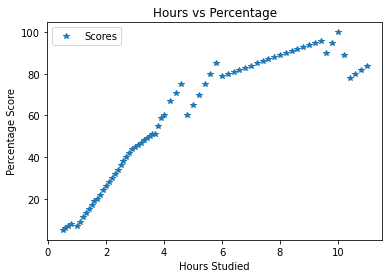

In [9]:

d.plot(x='Study hours', y='Scores', style='*') 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()  

- Test and Train (Checking for validation: every property of all data,)
- Train 80%,75%,70% , Test= 20%, 25%,30%

## Preparing the Data
Now we have an idea about statistical details of our data. The next step is to divide the data into "target" and "feature". Features are the independent variables while target is the dependent variable whose values are to be predicted.

- training set—a subset to train a model.
- test set—a subset to test the trained model.
### How to split:
Make sure that your test set meets the following two conditions:

- Is large enough to yield statistically meaningful results.
- Is representative of the data set as a whole. 
### Overfitting & Underfitting

- Overfitting occurs when a statistical model or machine learning algorithm captures the noise of the data.  Intuitively, overfitting occurs **when the model or the algorithm fits the data too well**.  Specifically, overfitting occurs if the model or algorithm shows **low bias but high variance**.

- Underfitting occurs when a statistical model or machine learning algorithm **cannot capture the underlying trend of the data**.  Intuitively, underfitting occurs when the model or the algorithm **does not fit the data well enough**.  Specifically, underfitting occurs if the model or algorithm shows **low variance but high bias**.  Underfitting is often a result of an excessively simple model.




  -     Bias: is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

    - Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.


##  Correlation coefficient 
Is a measure of the association between two variables. It is used to find the relationship is between data and a measure to check how strong it is. The formulas return a value between -1 and 1 wherein one shows -1 shows negative correlation and +1 shows a positive correlation


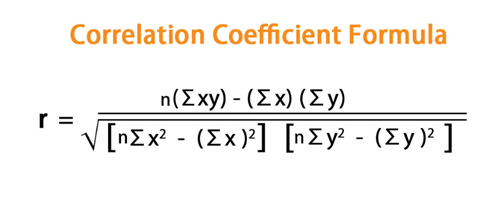

Positive value 1: -1 ,0 
    
    x - y
    
    linear: 0.7 : 
        0.5: ,- 0.5

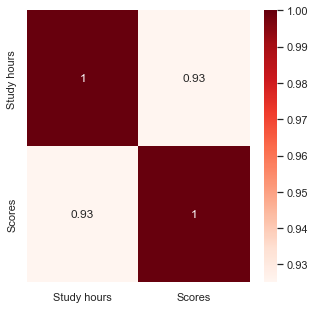

In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.figure(figsize=(5,5))
cor = d.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
d

In [11]:
X = d.iloc[:, :-1].values  ## Feature
y = d.iloc[:, 1].values    ## Target

## Scikit-Learn's built-in train_test_split() method:

### How to split:

Make sure that your test set meets the following two conditions:

- Is large enough to yield statistically meaningful results.

- Is representative of the data set as a whole. 

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

- The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.
- **random_state** : is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.If random_state is None or np.random, then a randomly-initialized RandomState object is returned.If random_state is an integer, then it is used to seed a new RandomState object.

## Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 
- **fit_intercept : boolean, optional, default True**:If set to False, no intercept will be used in calculations.
- **normalize : boolean, optional, default False**:This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.
- **copy_X : boolean, optional, default True** :If True, X will be copied; else, it may be overwritten.
- **n_jobs : int or None, optional (default=None)**:The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems

In [14]:
## Training 
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression()

 #### Lets see how linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. 

In [15]:
print(reg.intercept_)  ## Value of Y when X=0 

12.280135858662732


- 
- Score= 12 + 9(S.H)

In [16]:
print(reg.coef_)  

[8.98133673]


### Insight
-  This means that for every one unit of change in hours studied, the change in the score is about 10%

## Making Predictions
Now that we have trained our algorithm, it's time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make pre-dictions on the test data, execute the following script:

y= 1,2,3,4 

In [17]:
y_pred = reg.predict(X_test)  
y_pred 
##The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

array([ 41.02041339,  41.91854706,  73.35322561,  37.4278787 ,
        44.61294808,  78.74202764,  23.9558736 ,  93.11216641,
        48.20548277, 111.07483986,  87.72336437,  42.81668073,
        45.51108175,  62.57562153])

## To compare the actual output values for X_test with the predicted values

In [18]:
r = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
r  

,Actual,Predicted
0,47,41.020413
1,48,41.918547
2,83,73.353226
3,42,37.427879
4,51,44.612948
5,86,78.742028
6,13,23.955874
7,94,93.112166
8,60,48.205483
9,84,111.074840


## Evaluating the Algorithm

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

- **Mean Absolute Error (MAE) is the mean of the absolute value of the errors**
- **Mean Squared Error (MSE) is the mean of the squared errors**
- **Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors*

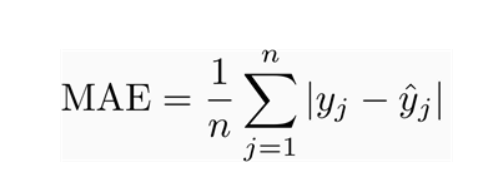


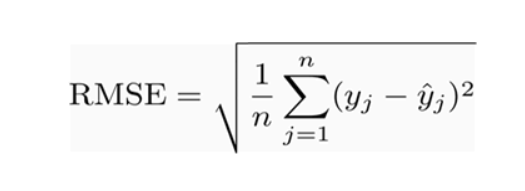

- R² score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the least square regression. (0-1)
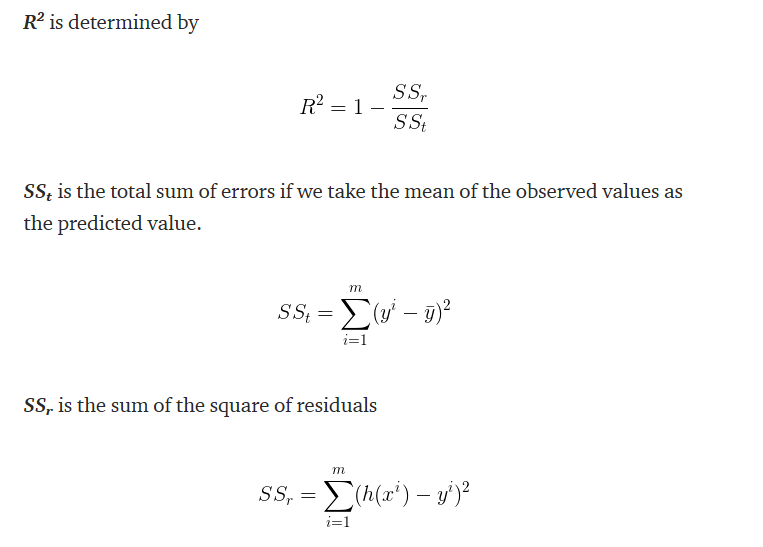

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7737387490176355


## Insight:
- We reduced the prediction error by ~ 37% by using regression

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  #average of absolute errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 8.786519674208
Mean Squared Error: 118.27576016275573
Root Mean Squared Error: 10.875465974511425


## Performance Improvement by Cross validation
In this approach, we reserve 50% of the dataset for validation and the remaining 50% for model training. However, a major disadvantage of this approach is that since we are training a model on only 50% of the dataset, there is a huge possibility that we might miss out on some interesting information about the data which will lead to a higher bias

In [21]:
from sklearn.model_selection import train_test_split  
train, validation = train_test_split(d, test_size=0.50, random_state = 5) 

In [22]:
X_train, X_v, y_train, y_v = train_test_split(X, y, test_size=0.5, random_state=5) 
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression()

In [23]:
print(reg.intercept_,reg.coef_)

9.92553102719343 [9.38937667]


In [24]:
y_pred = reg.predict(X_v)  
#y_pred

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_v, y_pred)
print(r2)

0.7757609981693818


In [26]:
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_v, y_pred)))

Root Mean Squared Error: 12.54060503949194


## Model Correction
One commonly used method for doing this is known as k-fold cross-validation , which uses the following approach: 1. Randomly divide a dataset into k groups, or “folds”, of roughly equal size. 2. Choose one of the folds to be the holdout set. Fit the model on the remaining k-1 folds

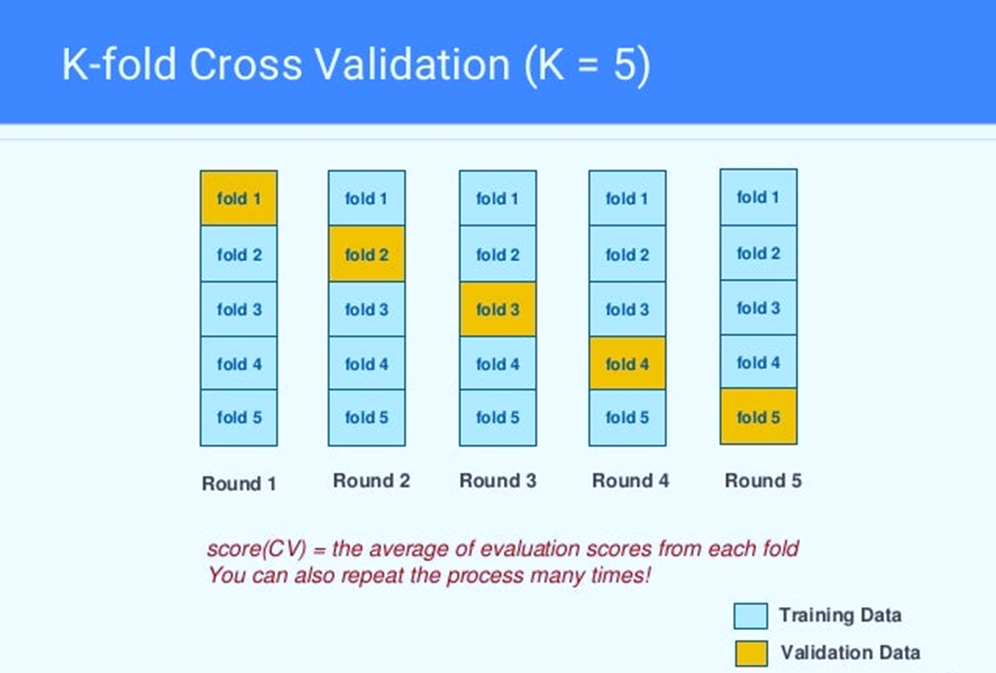

In [27]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores    

array([0.94404068, 0.6952943 , 0.9202145 , 0.95334434, 0.70546855])

In [29]:
np.mean(scores)

0.8436724749666646

In [ ]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

## Insights

- There are certain sections in data for which prediction per is greater than 90%


## Conclusion: Using K Fold method we are able to increase R2 Value.